## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 84.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 104.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 97.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.7.1 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
xarray 2025.7.1 requires pandas>=2.2, but you have p

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [2]:
# To help with reading and manipulation of data
import numpy as np
import pandas as pd

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To split the data
from sklearn.model_selection import train_test_split

# To impute missing values
from sklearn.impute import SimpleImputer

# To build a Random forest classifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics

# To tune a model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import StratifiedKFold, cross_val_score

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)


# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [3]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df_orig= pd.read_csv("/content/drive/MyDrive/Python_Course/EasyVisa.csv")
df=df_orig.copy()

## Import Dataset

In [7]:
print(df.info())
print(df.head())
print(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB
None
  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           Hi

In [15]:
print("There are", (df["no_of_employees"]<0).sum(), "rows with negative no_of_employees")

There are 33 rows with negative no_of_employees


There are 33 rows showing as negative value for employee count. This seems to be data error and needs to be imputed. But we will impute it after the data is split so that there is no data leakage that can effect the model.

In [8]:
df.isna().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


No null values that needs treatment


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [16]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [17]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [18]:
df.shape

(25480, 12)

#### Check the data types of the columns for the dataset

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [22]:
df_orig.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Fixing the negative values in number of employees columns

In [5]:
print((df_orig['no_of_employees'] < 0).sum())
df.loc[df['no_of_employees'] < 0, 'no_of_employees'] = np.nan
IMP = SimpleImputer(missing_values=np.nan, strategy='median')
IMP.fit(df[['no_of_employees']])
df[['no_of_employees']] = IMP.transform(df[['no_of_employees']])
df.describe().T


33


,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5669.801531,22877.371642,12.0000,1028.00,2112.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Let's check the count of each unique category in each of the categorical variables

In [6]:
for col in df.columns: # Loop through all columns in the dataframe
    if df[col].dtype == 'object': # Only apply for columns with categorical strings
        print("******************",col,"**************************")
        print(df[col].value_counts())# Replace strings with an integer
        print(df[col].unique())# Replace strings with an integer

****************** case_id **************************
case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
['EZYV01' 'EZYV02' 'EZYV03' ... 'EZYV25478' 'EZYV25479' 'EZYV25480']
****************** continent **************************
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
['Asia' 'Africa' 'North America' 'Europe' 'South America' 'Oceania']
****************** education_of_employee **************************
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
['High School' "Master's" "Bachelor's" 'Doctorate']
****************** has_job_experience **************************
has_job_experience
Y    14802
N    10678
Name: 

### Univariate Analysis

In [25]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [26]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

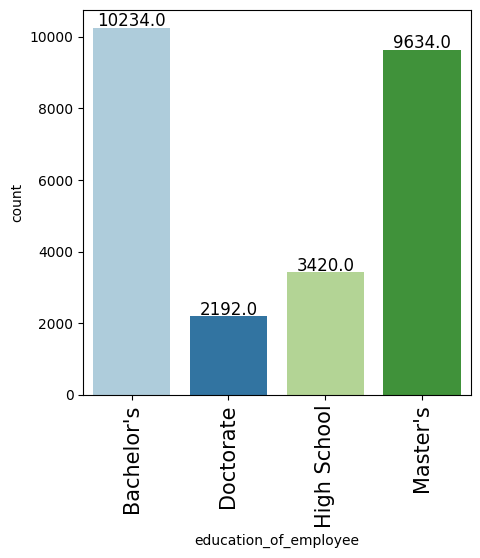

In [27]:
#histogram_boxplot(df, 'education_of_employee', figsize=(15, 10), kde=False, bins=None)
labeled_barplot(df, 'education_of_employee', perc=False, n=None)

#### Observations on region of employment

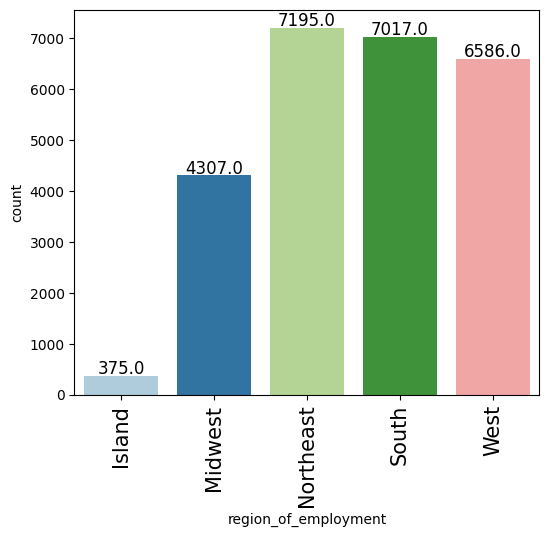

In [28]:
labeled_barplot(df, 'region_of_employment', perc=False, n=None)

#### Observations on job experience

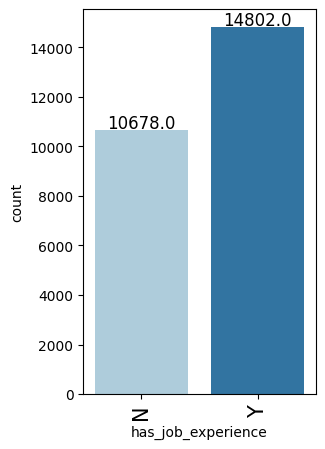

In [29]:
labeled_barplot(df, 'has_job_experience', perc=False, n=None)

#### Observations on case status

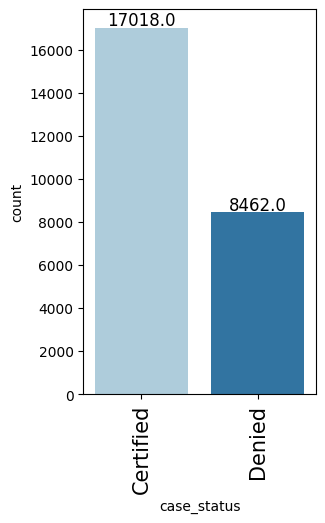

In [32]:
labeled_barplot(df, 'case_status', perc=False, n=None)

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [33]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [34]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

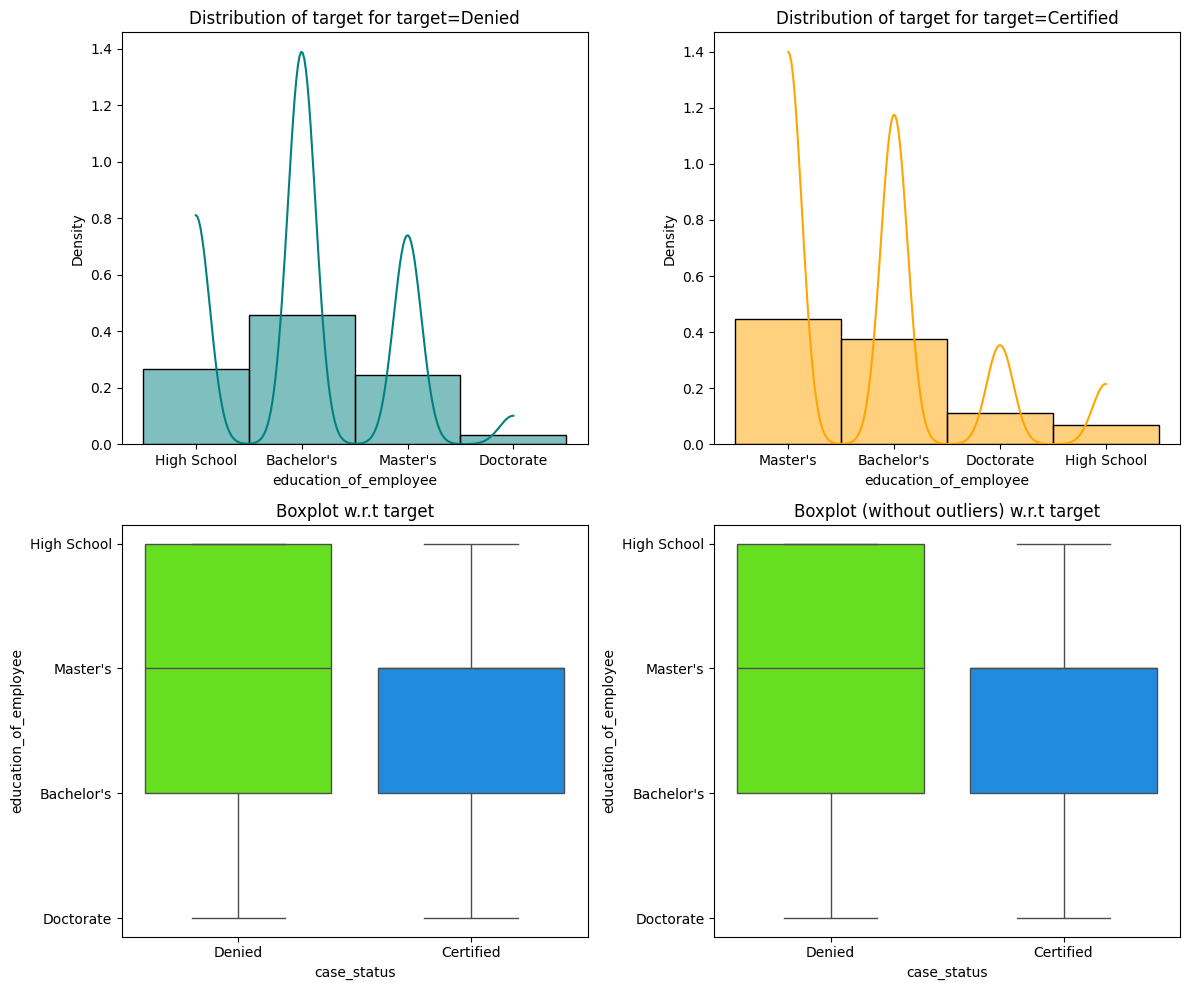

In [35]:
distribution_plot_wrt_target(df, "education_of_employee", "case_status")

There is some evidence that suggests that higher education,i.e. Doctorate and Masters have the least amount of case denials.

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


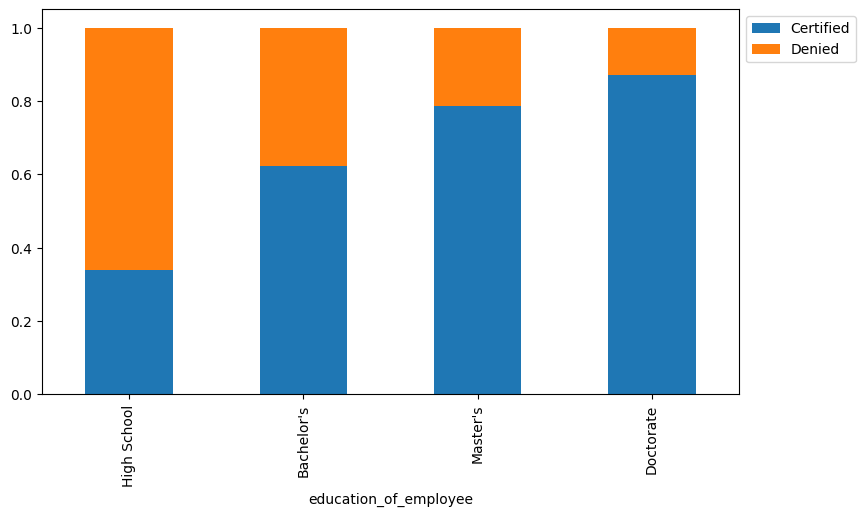

In [36]:
#distribution_plot_wrt_target(df, "education_of_employee", "case_status")
stacked_barplot(df, "education_of_employee", "case_status")


#### How does visa status vary across different continents?

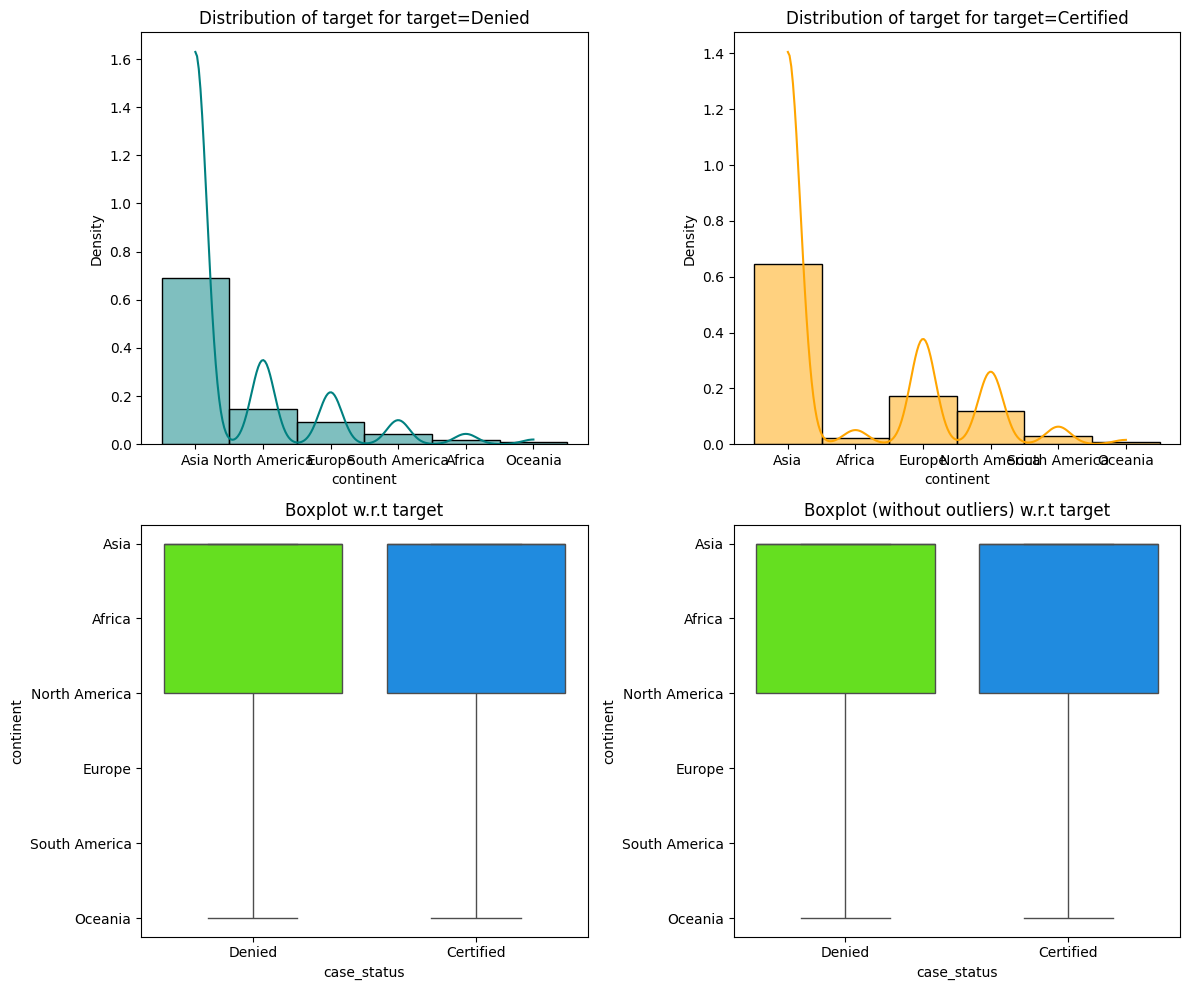

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


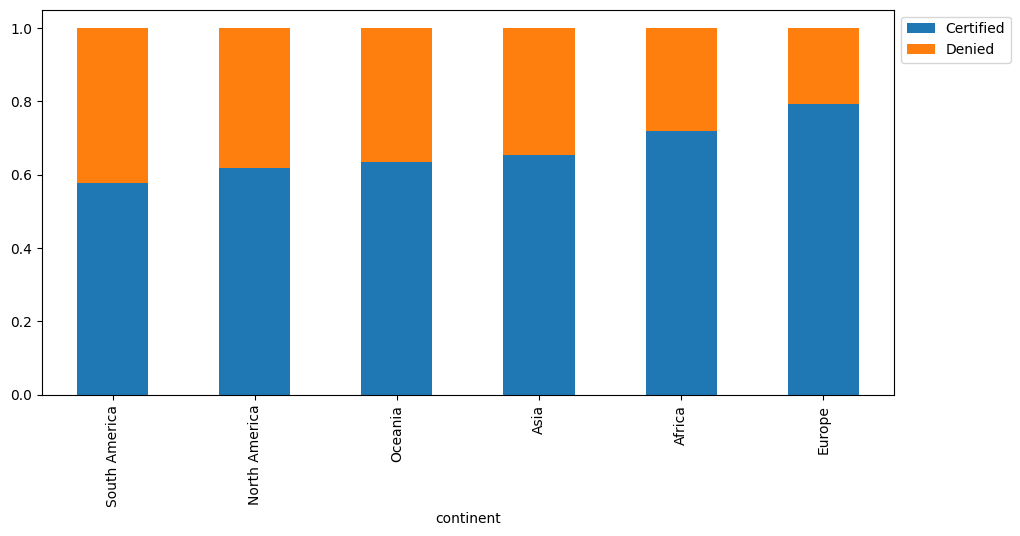

In [37]:
distribution_plot_wrt_target(df, "continent", "case_status")
stacked_barplot(df, "continent", "case_status")


Asia has the highest number of visa application. But Europe has the highest number of visa certification.

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

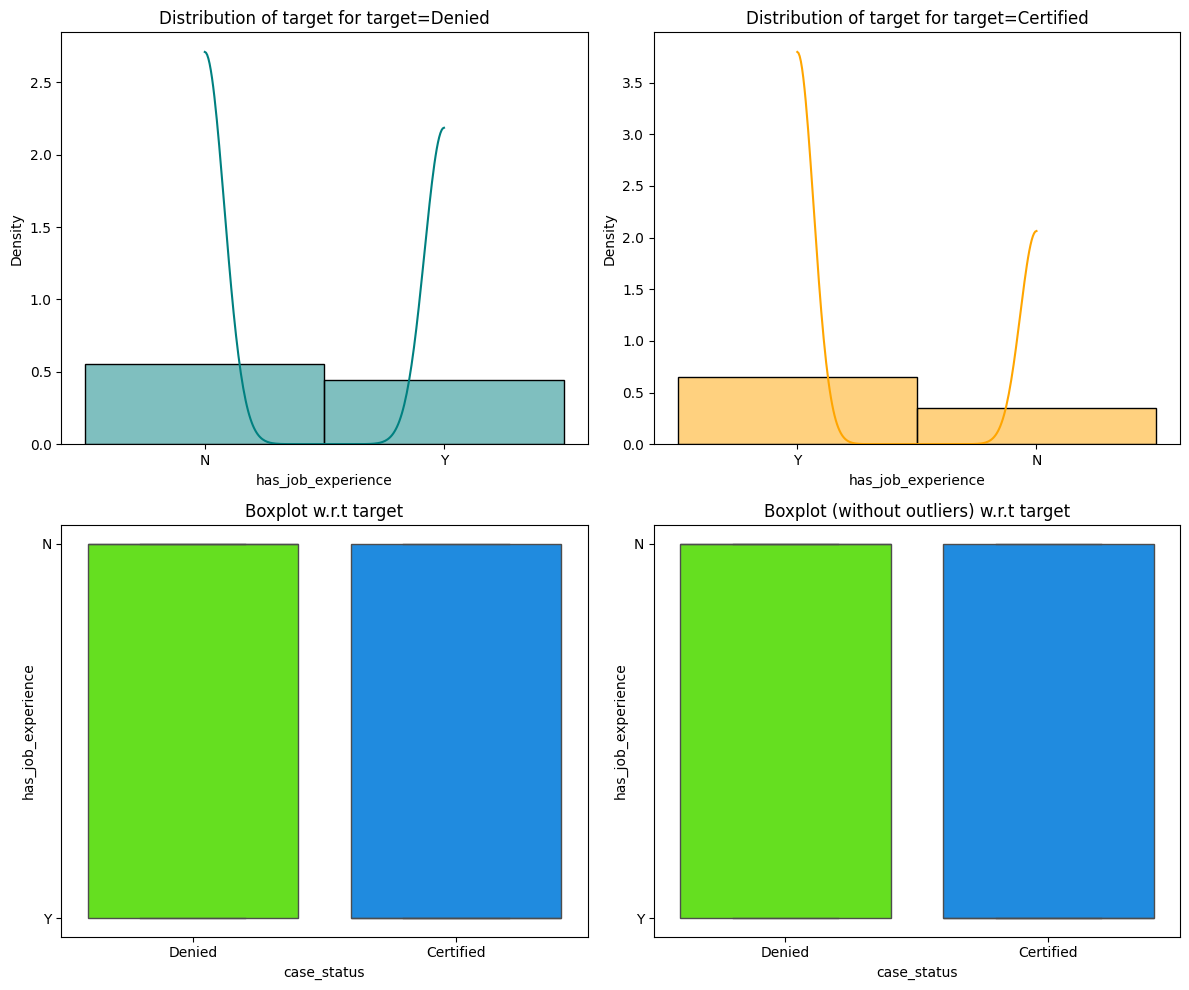

case_status         Certified  Denied    All
has_job_experience                          
All                     17001    8446  25447
N                        5986    4675  10661
Y                       11015    3771  14786
------------------------------------------------------------------------------------------------------------------------


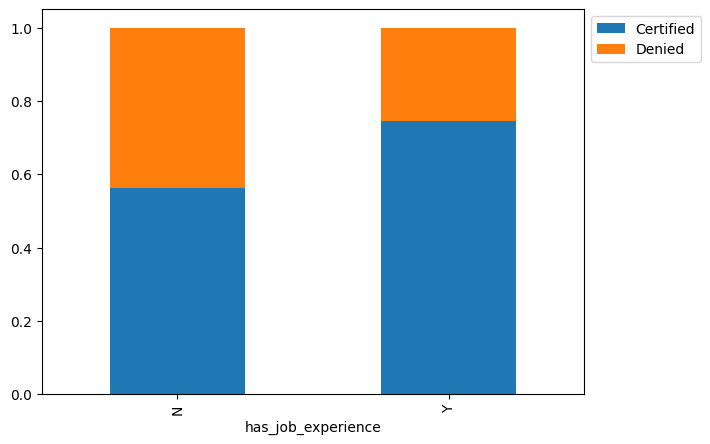

In [ ]:
distribution_plot_wrt_target(df, "has_job_experience", "case_status")
stacked_barplot(df, "has_job_experience", "case_status")


Yes, prior work experience does increase your chances for labor certificaiton approval.

#### Is the prevailing wage consistent across all regions of the US?

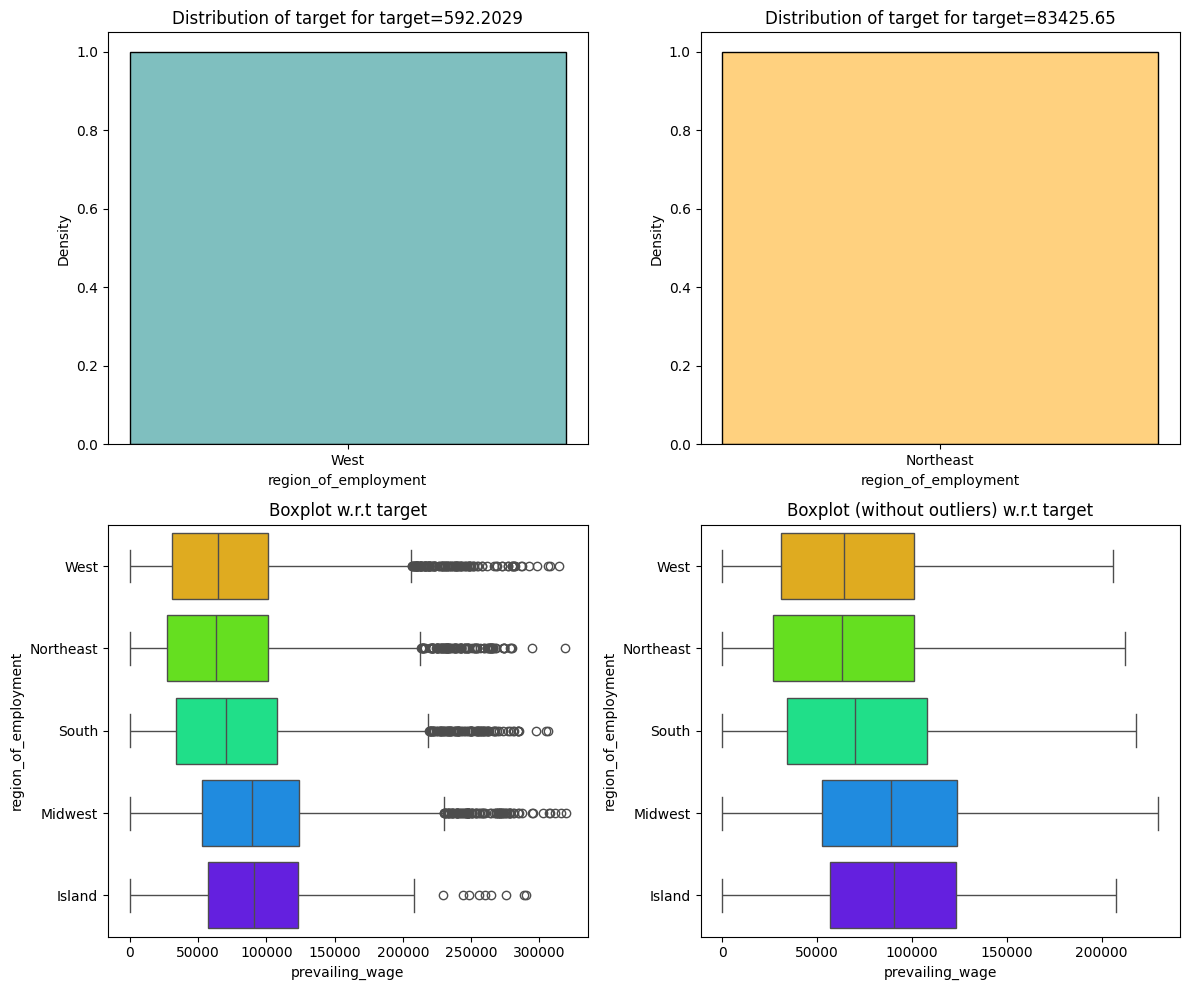

In [ ]:
distribution_plot_wrt_target(df, "region_of_employment", "prevailing_wage")


Midwest and Island seems to have higher median prevaling wage.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

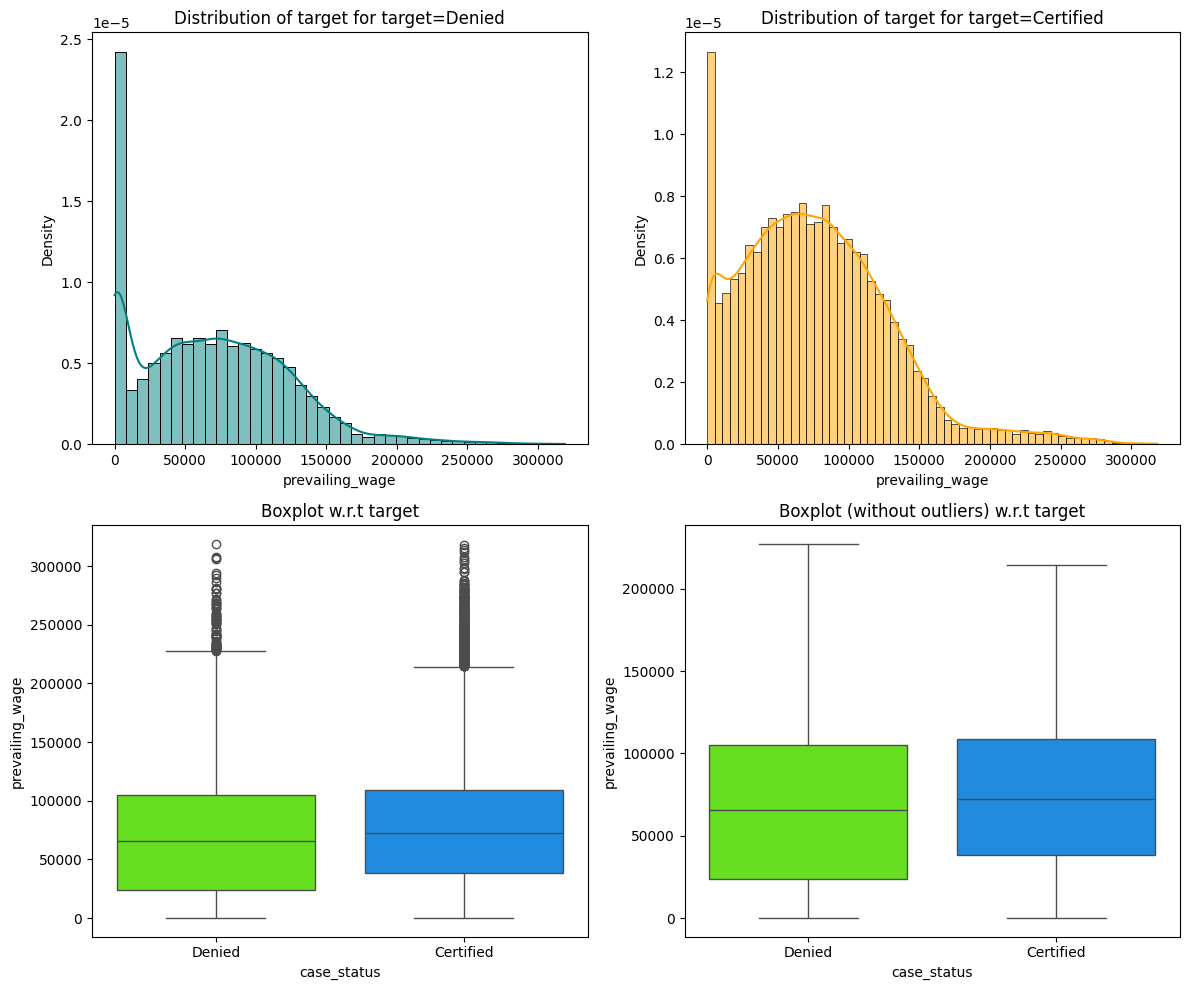

In [ ]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

It doesn't seem to be statistically significant but there is a slightly higher chance for approval with higher prevailing_wage. But it doesn't seem to be the most imparant feature as of now.

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17001    8446  25447
Year              16030    6903  22933
Hour                747    1406   2153
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


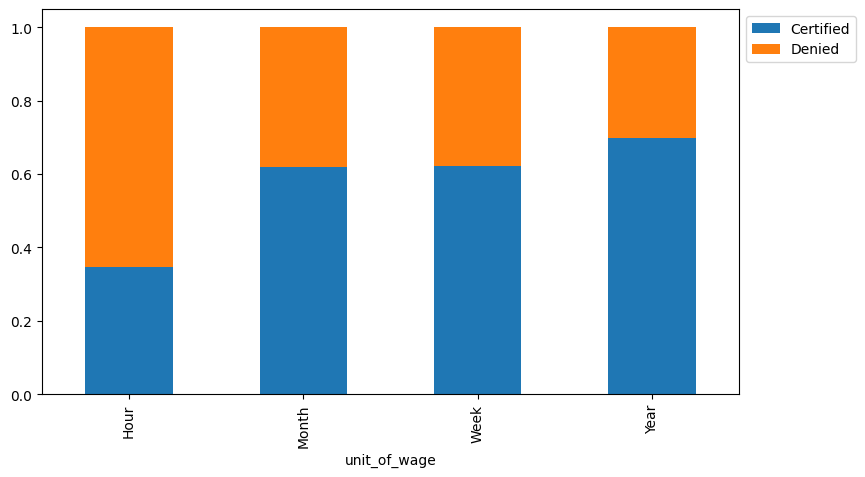

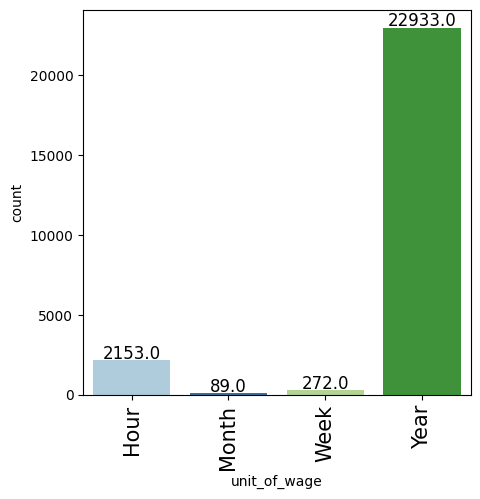

In [ ]:
#distribution_plot_wrt_target(df, "unit_of_wage", "case_status")
stacked_barplot(df, "unit_of_wage", "case_status")
labeled_barplot(df, "unit_of_wage", perc=False, n=None)

Hourly prevailing wage would most likely have the least approval chances around 35%.


## Data Pre-processing

### Outlier Check

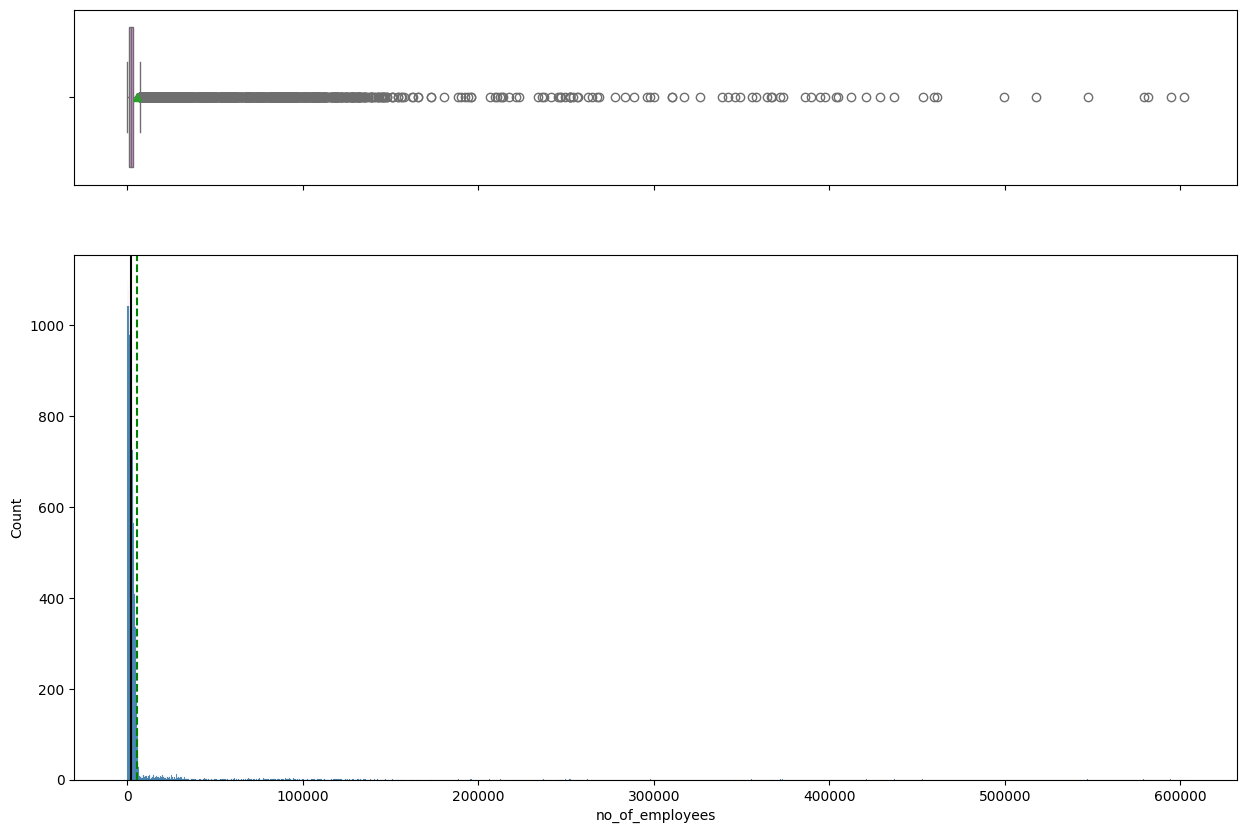

In [40]:
histogram_boxplot(df, "no_of_employees",figsize=(15, 10),kde=False, bins=None)

### Data Preparation for modeling

In [42]:
df["no_of_employees"].describe().T

,no_of_employees
count,25480.000000
mean,5669.801531
std,22877.371642
min,12.000000
25%,1028.000000
50%,2112.000000
75%,3504.000000
max,602069.000000


The mean employee count is around 5669 with standard deviation of 22877. If we apply 3 STD and try to include 99% samples, the value of employee count would be , 75000.

In [7]:
df_filtered=df[df["no_of_employees"]<=75000]
df_filtered.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25055.0,3304.631730,6431.127545,12.0000,1009.50,2076.00,3419.000,74815.00
yr_of_estab,25055.0,1979.525923,42.265223,1800.0000,1976.00,1997.00,2005.000,2016.00
prevailing_wage,25055.0,74483.760624,52892.248094,2.1367,34013.58,70308.53,107842.775,319210.27


Now the mean employee count is more close to 50%.Lets see below how the distribution looks after removing the outliers.


In [8]:
histogram_boxplot(df_filtered, "no_of_employees",figsize=(15, 10),kde=False, bins=None)

NameError: name 'histogram_boxplot' is not defined

This distribution is now much better than the original one. There are still some outliers, but these could be correct cases. We certianly have bigger companies in the U.S. having employees around 100K. Lets use this df_filtered going forward for model building.

## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [24]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [25]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = metrics.confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [66]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25055 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25055 non-null  object 
 1   continent              25055 non-null  object 
 2   education_of_employee  25055 non-null  object 
 3   has_job_experience     25055 non-null  object 
 4   requires_job_training  25055 non-null  object 
 5   no_of_employees        25055 non-null  float64
 6   yr_of_estab            25055 non-null  int64  
 7   region_of_employment   25055 non-null  object 
 8   prevailing_wage        25055 non-null  float64
 9   unit_of_wage           25055 non-null  object 
 10  full_time_position     25055 non-null  object 
 11  case_status            25055 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 2.5+ MB


In [9]:
replaceStruct = {
                "case_status":     {"Certified": 1, "Denied":0},
                "full_time_position": {"Y": 1, "N":0},
                 "requires_job_training":     {"Y": 1, "N":0},
                "has_job_experience":     {"Y": 1, "N": 0 },
                    }
onehotcols=["unit_of_wage","region_of_employment","continent","education_of_employee"]

In [10]:
df_filtered=df_filtered.replace(replaceStruct)
X=df_filtered.drop(['case_status','case_id'],axis=1)
y=df_filtered["case_status"]
X=pd.get_dummies(X,columns=onehotcols,drop_first=True)
X=X.astype(float)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25055 entries, 0 to 25479
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   has_job_experience                 25055 non-null  float64
 1   requires_job_training              25055 non-null  float64
 2   no_of_employees                    25055 non-null  float64
 3   yr_of_estab                        25055 non-null  float64
 4   prevailing_wage                    25055 non-null  float64
 5   full_time_position                 25055 non-null  float64
 6   unit_of_wage_Month                 25055 non-null  float64
 7   unit_of_wage_Week                  25055 non-null  float64
 8   unit_of_wage_Year                  25055 non-null  float64
 9   region_of_employment_Midwest       25055 non-null  float64
 10  region_of_employment_Northeast     25055 non-null  float64
 11  region_of_employment_South         25055 non-null  float64


Now lets check the output classification -The majority class is approval.

In [11]:
print(X.shape)
print(y.shape)
print(y.value_counts())
print(y.value_counts(1))

(25055, 21)
(25055,)
case_status
1    16712
0     8343
Name: count, dtype: int64
case_status
1    0.667013
0    0.332987
Name: proportion, dtype: float64


Now let's split the data in three. Train, Validation and Test.

In [13]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=.20, random_state=1,stratify=y)

In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=.20, random_state=1,stratify=y_temp)

In [15]:
print(y_train.value_counts(1))
print(y_val.value_counts(1))

case_status
1    0.667041
0    0.332959
Name: proportion, dtype: float64
case_status
1    0.666999
0    0.333001
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

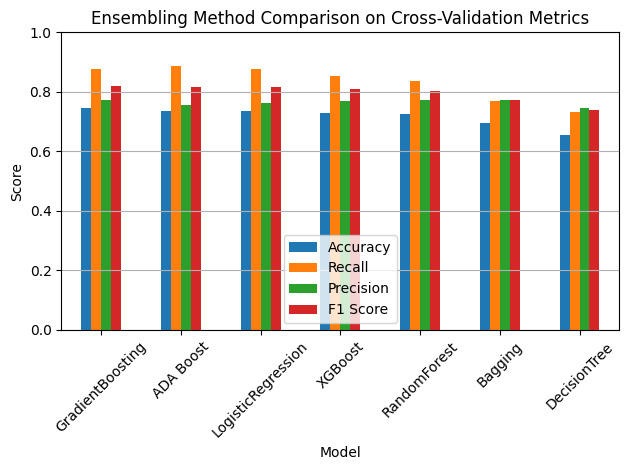

In [16]:
# Define models
models = {
    "Bagging": BaggingClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "LogisticRegression": LogisticRegression(random_state=1, max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "ADA Boost": AdaBoostClassifier(random_state=1),
    "XGBoost": XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    "GradientBoosting": GradientBoostingClassifier(random_state=1),
}

# Define scoring metrics
scoring = ['accuracy', 'recall', 'precision', 'f1']

# Cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Store results
results = []

for name, model in models.items():
    scores = cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append({
        "Model": name,
        "Accuracy": scores['test_accuracy'].mean(),
        "Recall": scores['test_recall'].mean(),
        "Precision": scores['test_precision'].mean(),
        "F1 Score": scores['test_f1'].mean()
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False).round(3)

import matplotlib.pyplot as plt
import seaborn as sns

# Optional: visualize
plt.figure(figsize=(12, 6))
results_df.set_index("Model")[["Accuracy", "Recall", "Precision", "F1 Score"]].plot(kind="bar")
plt.title("Ensembling Method Comparison on Cross-Validation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [97]:
print(results_df)

                Model  Accuracy  Recall  Precision  F1 Score
6    GradientBoosting     0.746   0.876      0.773     0.821
4           ADA Boost     0.735   0.887      0.757     0.817
2  LogisticRegression     0.735   0.877      0.762     0.815
5             XGBoost     0.730   0.853      0.768     0.808
1        RandomForest     0.727   0.836      0.773     0.803
0             Bagging     0.694   0.770      0.771     0.771
3        DecisionTree     0.655   0.733      0.745     0.739


ADA Boost seems like the best ensembling method with the best recall score of 0.887. I would use ADA boosting to plot confusion matrix on train and validation data set.


In [98]:
ada=ada=AdaBoostClassifier(random_state=1)
ada.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [114]:
print("ADA on Train Data Set: \n",model_performance_classification_sklearn(ada, X_train, y_train))
print("ADA on Validtion Data Set: \n",model_performance_classification_sklearn(ada, X_val, y_val))
print("ADA on Test Data Set: \n",model_performance_classification_sklearn(ada, X_test, y_test))

ADA on Train Data Set: 
    Accuracy    Recall  Precision        F1
0  0.734892  0.889024   0.756303  0.817311
ADA on Validtion Data Set: 
    Accuracy    Recall  Precision        F1
0  0.738089  0.893792   0.757288  0.819897
ADA on Test Data Set: 
    Accuracy    Recall  Precision        F1
0  0.739972  0.886595   0.762285  0.819754


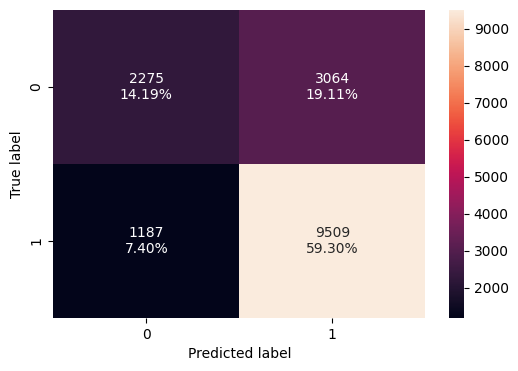

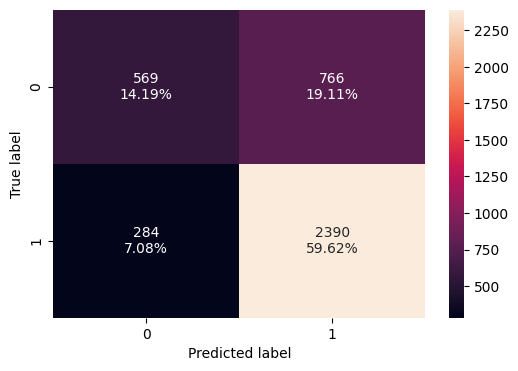

In [104]:
confusion_matrix_sklearn(ada, X_train, y_train)
confusion_matrix_sklearn(ada, X_val, y_val)

### Model Building with Oversampled data

In [18]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [19]:
print(X_train_over.shape)
print(y_train_over.shape)
print(y_train.value_counts(1))
print(y_train_over.value_counts(1))

(21392, 21)
(21392,)
case_status
1    0.667041
0    0.332959
Name: proportion, dtype: float64
case_status
0    0.5
1    0.5
Name: proportion, dtype: float64


<Figure size 1200x600 with 0 Axes>

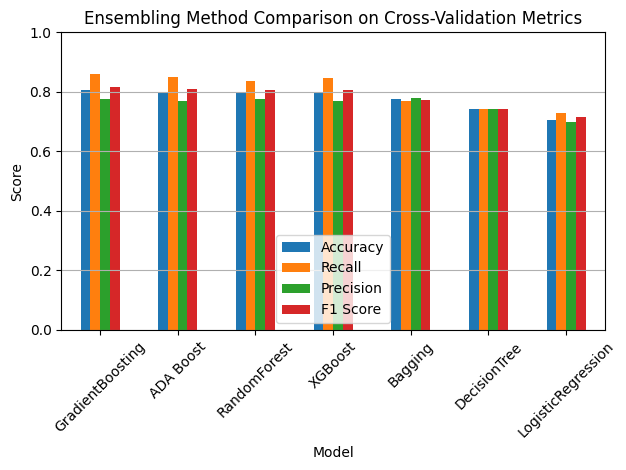

In [20]:
# Define models
models = {
    "Bagging": BaggingClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "LogisticRegression": LogisticRegression(random_state=1, max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "ADA Boost": AdaBoostClassifier(random_state=1),
    "XGBoost": XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    "GradientBoosting": GradientBoostingClassifier(random_state=1),
}

# Define scoring metrics
scoring = ['accuracy', 'recall', 'precision', 'f1']

# Cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Store results
results = []

for name, model in models.items():
    scores = cross_validate(model, X_train_over, y_train_over, cv=kfold, scoring=scoring)
    results.append({
        "Model": name,
        "Accuracy": scores['test_accuracy'].mean(),
        "Recall": scores['test_recall'].mean(),
        "Precision": scores['test_precision'].mean(),
        "F1 Score": scores['test_f1'].mean()
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False).round(3)

import matplotlib.pyplot as plt
import seaborn as sns

# Optional: visualize
plt.figure(figsize=(12, 6))
results_df.set_index("Model")[["Accuracy", "Recall", "Precision", "F1 Score"]].plot(kind="bar")
plt.title("Ensembling Method Comparison on Cross-Validation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
results_df

,Model,Accuracy,Recall,Precision,F1 Score
6,GradientBoosting,0.807,0.859,0.777,0.816
4,ADA Boost,0.798,0.851,0.770,0.808
1,RandomForest,0.798,0.838,0.777,0.806
5,XGBoost,0.796,0.847,0.768,0.806
0,Bagging,0.776,0.769,0.780,0.774
3,DecisionTree,0.742,0.742,0.742,0.742
2,LogisticRegression,0.707,0.730,0.698,0.714


After the oversampling, Gradient Bossting classification has the highest Recall. Lets's use Gradient Boosting to train the data set.

In [22]:
GB_over=GradientBoostingClassifier(random_state=1)
GB_over.fit(X_train_over,y_train_over)

GradientBoostingClassifier(random_state=1)

In [27]:
print("Gradient Bossting on Over Sampling Train Data Set: \n",model_performance_classification_sklearn(GB_over, X_train_over, y_train_over))
print("Gradient Bossting on Validation Data Set: \n",model_performance_classification_sklearn(GB_over, X_val, y_val))
print("Gradient Bossting  on Test Data Set: \n",model_performance_classification_sklearn(GB_over, X_test, y_test))

Gradient Bossting on Over Sampling Train Data Set: 
    Accuracy    Recall  Precision        F1
0  0.810443  0.864435   0.780187  0.820153
Gradient Bossting on Validation Data Set: 
    Accuracy    Recall  Precision        F1
0  0.749065  0.859387   0.784836  0.820421
Gradient Bossting  on Test Data Set: 
    Accuracy    Recall  Precision        F1
0  0.748354  0.860862   0.783283  0.820242


The overall Recall score has decreased after oversampling of minority class (Denials)

### Model Building with Undersampled data

In [28]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy = 1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<Figure size 1200x600 with 0 Axes>

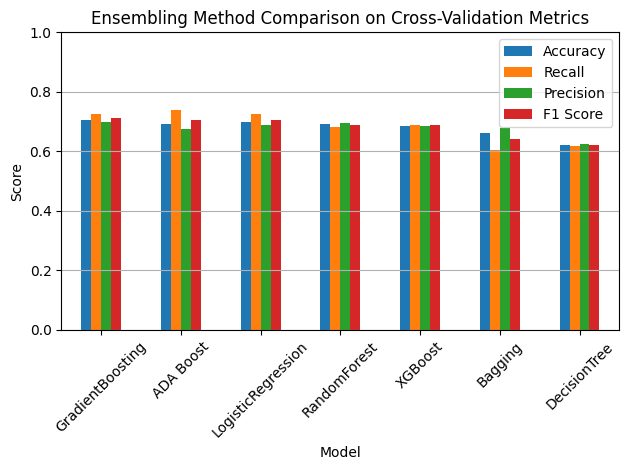

In [29]:
# Define models
models = {
    "Bagging": BaggingClassifier(random_state=1),
    "RandomForest": RandomForestClassifier(random_state=1),
    "LogisticRegression": LogisticRegression(random_state=1, max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(random_state=1),
    "ADA Boost": AdaBoostClassifier(random_state=1),
    "XGBoost": XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    "GradientBoosting": GradientBoostingClassifier(random_state=1),
}

# Define scoring metrics
scoring = ['accuracy', 'recall', 'precision', 'f1']

# Cross-validation setup
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

# Store results
results = []

for name, model in models.items():
    scores = cross_validate(model, X_train_un, y_train_un, cv=kfold, scoring=scoring)
    results.append({
        "Model": name,
        "Accuracy": scores['test_accuracy'].mean(),
        "Recall": scores['test_recall'].mean(),
        "Precision": scores['test_precision'].mean(),
        "F1 Score": scores['test_f1'].mean()
    })

# Convert to DataFrame and display
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="F1 Score", ascending=False).round(3)

import matplotlib.pyplot as plt
import seaborn as sns

# Optional: visualize
plt.figure(figsize=(12, 6))
results_df.set_index("Model")[["Accuracy", "Recall", "Precision", "F1 Score"]].plot(kind="bar")
plt.title("Ensembling Method Comparison on Cross-Validation Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
results_df

,Model,Accuracy,Recall,Precision,F1 Score
6,GradientBoosting,0.707,0.726,0.700,0.712
4,ADA Boost,0.692,0.740,0.676,0.706
2,LogisticRegression,0.697,0.724,0.688,0.705
1,RandomForest,0.691,0.683,0.695,0.688
5,XGBoost,0.686,0.689,0.685,0.687
0,Bagging,0.660,0.606,0.680,0.641
3,DecisionTree,0.623,0.619,0.624,0.621


ADA Boosting has the highest recall score after the under sampling of the majority class.

In [31]:
ada_under=AdaBoostClassifier(random_state=1)
ada_under.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=1)

In [32]:
print("ADA on Train_Under Data Set: \n",model_performance_classification_sklearn(ada_under, X_train_un, y_train_un))
print("ADA on Validtion Data Set: \n",model_performance_classification_sklearn(ada_under, X_val, y_val))
print("ADA on Test Data Set: \n",model_performance_classification_sklearn(ada_under, X_test, y_test))

ADA on Train_Under Data Set: 
    Accuracy    Recall  Precision        F1
0  0.694699  0.744896   0.676936  0.709292
ADA on Validtion Data Set: 
    Accuracy    Recall  Precision        F1
0  0.700175  0.726627   0.804888  0.763758
ADA on Test Data Set: 
    Accuracy    Recall  Precision        F1
0  0.706845  0.739078   0.805347  0.770791


Again the recall score has further reduced with undersampling. This is probably not a best model either.

## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

## Model Performance Summary and Final Model Selection

I will use original data set as that had the highest recall score.  I will use the random search CV to identify the best parameters for ADA Bossting, Gradent Boosting (Random SearchCV) and XGradient Bossting (Grid Search CV).


In [118]:
# Define model
model = AdaBoostClassifier(random_state=1)

# Define parameter grid
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Use recall as the scoring metric
scorer = metrics.make_scorer(metrics.recall_score)

# Set up RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_jobs=1,
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
)

# Run search
randomized_cv.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", randomized_cv.best_params_)

Best parameters: {'n_estimators': np.int64(60), 'learning_rate': 0.05, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)}


In [131]:
# Set AdaBoost with the best parameters
ADA_tuned = AdaBoostClassifier(
    n_estimators=60,
    learning_rate=0.05,
    estimator=DecisionTreeClassifier(max_depth=1, random_state=1),
    random_state=1
)

# Fit the best algorithm to the data.
ADA_tuned_orig=ADA_tuned.fit(X_train, y_train)


In [132]:
print("ADA Tuned on Train Data Set: \n",model_performance_classification_sklearn(ADA_tuned_orig, X_train, y_train))
print("ADA Tuned on Validtion Data Set: \n",model_performance_classification_sklearn(ADA_tuned_orig, X_val, y_val))
print("ADA Tuned on Test Data Set: \n",model_performance_classification_sklearn(ADA_tuned_orig, X_test, y_test))

ADA Tuned on Train Data Set: 
    Accuracy    Recall  Precision        F1
0  0.689305  0.969708   0.690086  0.806344
ADA Tuned on Validtion Data Set: 
    Accuracy    Recall  Precision        F1
0  0.686455  0.971204   0.687583  0.805146
ADA Tuned on Test Data Set: 
    Accuracy    Recall  Precision        F1
0  0.697665  0.972472   0.695485  0.810979


Beautiful ! Now the recall score on Validation and Test data set has increased to 0.97. Awesomeness.

In [158]:
# Get feature importances from ada_under
importances = ADA_tuned.feature_importances_

# Match them to column names
feature_names = X_train.columns  # assuming X_train is the input used

# Create a DataFrame for sorting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feat_imp_df

,Feature,Importance
19,education_of_employee_High School,0.362097
0,has_job_experience,0.206254
20,education_of_employee_Master's,0.182004
4,prevailing_wage,0.150846
18,education_of_employee_Doctorate,0.053011
8,unit_of_wage_Year,0.045788
3,yr_of_estab,0.000000
1,requires_job_training,0.000000
2,no_of_employees,0.000000
9,region_of_employment_Midwest,0.000000


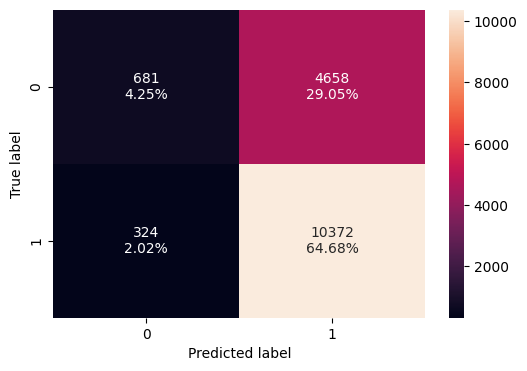

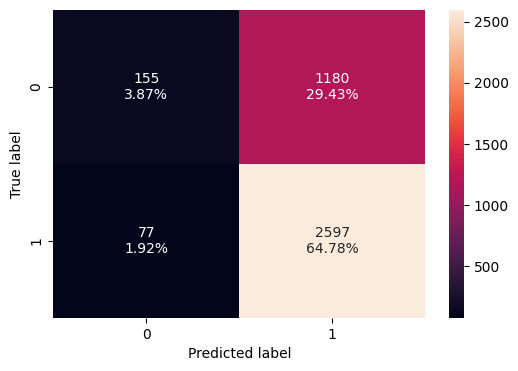

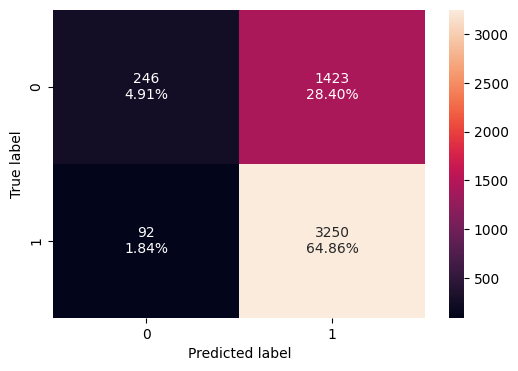

In [162]:
confusion_matrix_sklearn(ADA_tuned_orig, X_train, y_train)
confusion_matrix_sklearn(ADA_tuned_orig, X_val, y_val)
confusion_matrix_sklearn(ADA_tuned_orig, X_test, y_test)


In [136]:
# Define the model
XGB = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Define parameter grid for XGBoost
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "max_depth": [1, 2, 3, 4, 5],
    "subsample": [0.8, 1],
    "colsample_bytree": [0.8, 1],
    "gamma": [0, 0.1, 0.2, 0.5, 1]  # Add gamma here
}

# Use recall as the scoring metric
scorer = metrics.make_scorer(metrics.recall_score)

# Set up RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=XGB,
    param_distributions=param_grid,
    n_jobs=1,        # use -1 for parallel processing if stable
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    verbose=1
)

# Run search
randomized_cv.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", randomized_cv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.8, 'n_estimators': np.int64(30), 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.8}


In [174]:
# Define parameter grid for XGBoost
param_grid = {
    "n_estimators": 30,
    "learning_rate": 0.1,
    "max_depth": 3,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    'gamma': 0
}


XGB_tuned = XGBClassifier(
    n_estimators=20,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=1,
    use_label_encoder=False,
    eval_metric='logloss',
    gamma=0
)

XGB_tuned_orig=XGB_tuned.fit(X_train, y_train)

I changed the learning rate to 0.1 otherwise i was getting over fit model.

In [176]:
print("XGB Tuned on Train Data Set: \n",model_performance_classification_sklearn(XGB_tuned_orig, X_train, y_train))
print("XGB Tuned on Validtion Data Set: \n",model_performance_classification_sklearn(XGB_tuned_orig, X_val, y_val))
print("XGB Tuned on Test Data Set: \n",model_performance_classification_sklearn(XGB_tuned_orig, X_test, y_test))

XGB Tuned on Train Data Set: 
    Accuracy    Recall  Precision        F1
0  0.737013  0.919783   0.745472  0.823505
XGB Tuned on Validtion Data Set: 
    Accuracy  Recall  Precision        F1
0  0.731604  0.9181   0.741244  0.820247
XGB Tuned on Test Data Set: 
    Accuracy    Recall  Precision        F1
0  0.732389  0.913824   0.743608  0.819976


In [177]:
# Get feature importances from ada_under
importances = XGB_tuned_orig.feature_importances_

# Match them to column names
feature_names = X_train.columns  # assuming X_train is the input used

# Create a DataFrame for sorting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feat_imp_df

,Feature,Importance
19,education_of_employee_High School,0.286780
18,education_of_employee_Doctorate,0.118496
20,education_of_employee_Master's,0.104581
0,has_job_experience,0.101908
8,unit_of_wage_Year,0.082425
4,prevailing_wage,0.064284
11,region_of_employment_South,0.061740
14,continent_Europe,0.052810
9,region_of_employment_Midwest,0.037616
12,region_of_employment_West,0.027305


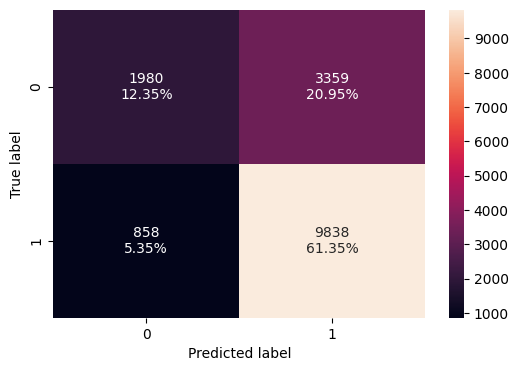

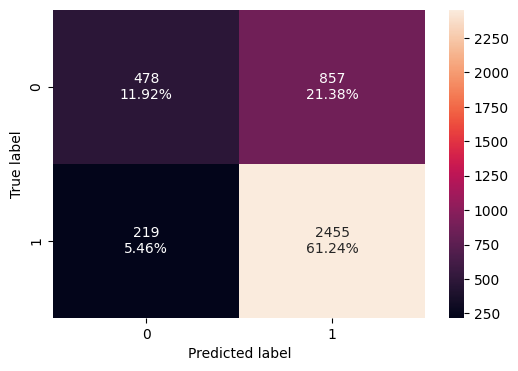

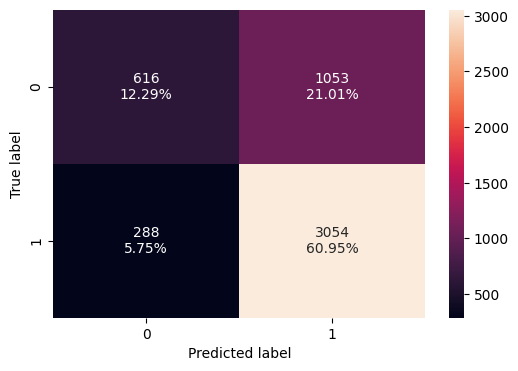

In [178]:
confusion_matrix_sklearn(XGB_tuned_orig, X_train, y_train)
confusion_matrix_sklearn(XGB_tuned_orig, X_val, y_val)
confusion_matrix_sklearn(XGB_tuned_orig, X_test, y_test)


In [137]:
# Define the model
GB = GradientBoostingClassifier(random_state=1)

# Define parameter grid for Gradient Boosting
param_grid = {
    "n_estimators": np.arange(10, 110, 10),
    "learning_rate": [0.1, 0.01, 0.2, 0.05, 1],
    "max_depth": [1, 2, 3, 4, 5],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.8, 1.0]
}

# Use recall as the scoring metric
scorer = metrics.make_scorer(metrics.recall_score)

# Set up RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=GB,
    param_distributions=param_grid,
    n_jobs=1,        # Use all cores if stable
    n_iter=50,
    scoring=scorer,
    cv=5,
    random_state=1,
    verbose=1
)

# Run search
randomized_cv.fit(X_train, y_train)

# Print best parameters
print("Best parameters:", randomized_cv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 0.8, 'n_estimators': np.int64(40), 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 4, 'learning_rate': 0.01}


In [179]:
GB_tuned = GradientBoostingClassifier(
    n_estimators=40,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    min_samples_split=10,
    min_samples_leaf=2,
    random_state=1,

)

GB_tuned_orig=GB_tuned.fit(X_train, y_train)

In [180]:
print("XGB Tuned on Train Data Set: \n",model_performance_classification_sklearn(GB_tuned_orig, X_train, y_train))
print("XGB Tuned on Validtion Data Set: \n",model_performance_classification_sklearn(GB_tuned_orig, X_val, y_val))
print("XGB Tuned on Test Data Set: \n",model_performance_classification_sklearn(GB_tuned_orig, X_test, y_test))

XGB Tuned on Train Data Set: 
    Accuracy    Recall  Precision        F1
0  0.756221  0.884723   0.779554  0.828815
XGB Tuned on Validtion Data Set: 
    Accuracy    Recall  Precision        F1
0  0.749314  0.882947   0.773338  0.824515
XGB Tuned on Test Data Set: 
    Accuracy   Recall  Precision        F1
0   0.75015  0.87702   0.777041  0.824009


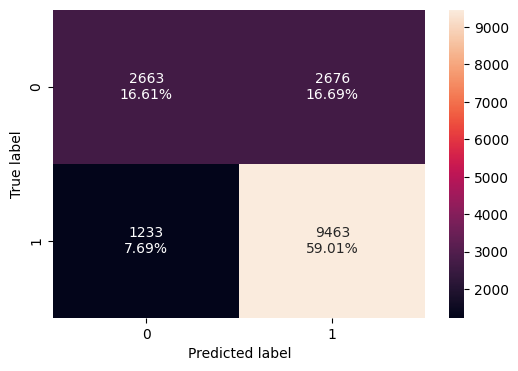

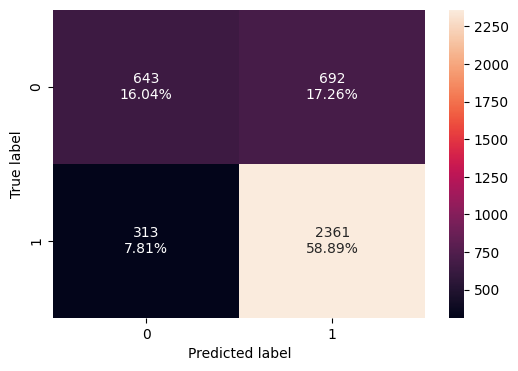

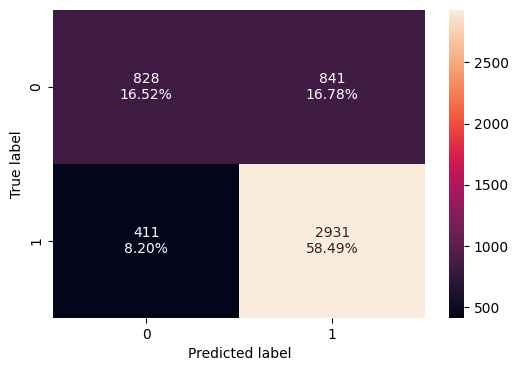

In [181]:
confusion_matrix_sklearn(GB_tuned_orig, X_train, y_train)
confusion_matrix_sklearn(GB_tuned_orig, X_val, y_val)
confusion_matrix_sklearn(GB_tuned_orig, X_test, y_test)

Now lets try to set this XGboost for GridSearch to get the best parameters.

In [184]:
# Define the base model
xgb_cv = XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss')

# Define grid of parameters
param_grid = {
    "n_estimators": [150, 200, 250],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 4, 5],
    "subsample": [0.3, 0.5, 0.7],
    "colsample_bytree": [0.3, 0.5, 0.7],
    "gamma": [0, 0.1, 0.2],
    "min_child_weight": [1, 3, 5]
}

# Use recall as the scoring metric
recall_scorer = metrics.make_scorer(metrics.recall_score)

# Set up GridSearchCV
grid_obj = GridSearchCV(
    estimator=xgb_cv,
    param_grid=param_grid,
    scoring=recall_scorer,
    cv=5,
    n_jobs=1,
    verbose=2
)

# Fit the model
grid_obj.fit(X_train, y_train)

# Show best parameters
print("Best parameters:", grid_obj.best_params_)

Streaming output truncated to the last 5000 lines.
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=250, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=250, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=250, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=250, subsample=0.7; total time=   0.4s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=150, subsample=0.3; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=150, subsample=0.3; total time=   0.3s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5,

In [34]:
param_grid = {
    "n_estimators": 150,
    "learning_rate": 0.01,
    "max_depth": 3,
    "subsample": 0.3,
    "colsample_bytree": 0.3,
    "gamma": 0.2,
    "min_child_weight": 3,
    "random_state": 1,
    "use_label_encoder": False,
    "eval_metric": "logloss"
}

# Unpack the dictionary using **
XGB_tuned_grid = XGBClassifier(**param_grid)

# Fit the model
XGB_tuned_grid .fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0.2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, ...)

In [190]:
print("XGB Tuned on Train Data Set: \n",model_performance_classification_sklearn(XGB_tuned_grid , X_train, y_train))
print("XGB Tuned on Validtion Data Set: \n",model_performance_classification_sklearn(XGB_tuned_grid , X_val, y_val))
print("XGB Tuned on Test Data Set: \n",model_performance_classification_sklearn(XGB_tuned_grid , X_test, y_test))

XGB Tuned on Train Data Set: 
    Accuracy   Recall  Precision        F1
0  0.698722  0.97831   0.694682  0.812454
XGB Tuned on Validtion Data Set: 
    Accuracy    Recall  Precision        F1
0  0.692442  0.976814   0.690457  0.809044
XGB Tuned on Test Data Set: 
    Accuracy    Recall  Precision        F1
0   0.69986  0.981149   0.694703  0.813446


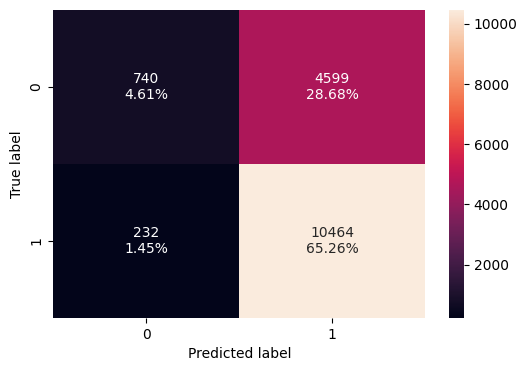

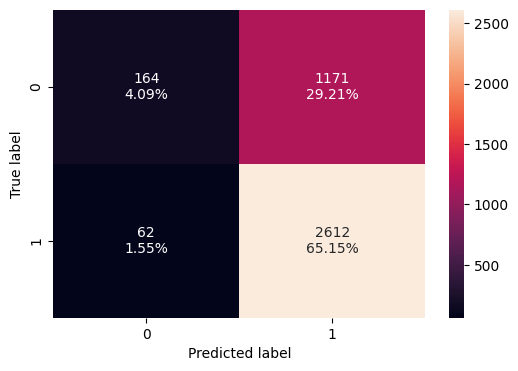

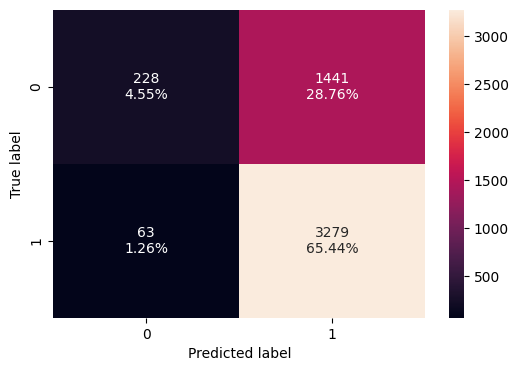

In [36]:
confusion_matrix_sklearn(XGB_tuned_grid, X_train, y_train)
confusion_matrix_sklearn(XGB_tuned_grid, X_val, y_val)
confusion_matrix_sklearn(XGB_tuned_grid, X_test, y_test)


In [35]:
# Get feature importances from ada_under
importances = XGB_tuned_grid.feature_importances_

# Match them to column names
feature_names = X_train.columns  # assuming X_train is the input used

# Create a DataFrame for sorting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
feat_imp_df

,Feature,Importance
19,education_of_employee_High School,0.319942
20,education_of_employee_Master's,0.129347
0,has_job_experience,0.128972
8,unit_of_wage_Year,0.115839
18,education_of_employee_Doctorate,0.061842
14,continent_Europe,0.050859
4,prevailing_wage,0.042495
9,region_of_employment_Midwest,0.028716
12,region_of_employment_West,0.018593
15,continent_North America,0.013463


## Actionable Insights and Recommendations

The Gridsearch CV on the XGradient boost has given 0.98 on the Recall score. This is probably the best tuned model for our use case. Based on the most important features, education, prior experience, prevailing wage and yearly salary are the most important features deciding the positive outcome for labor certification approval.

<font size=6 color='blue'>Power Ahead</font>
___

In [209]:
!cp "/content/drive/MyDrive/Python_Course/EasyVisa_Full_Code_Notebook.ipynb" .


In [210]:
!jupyter nbconvert --to html EasyVisa_Full_Code_Notebook.ipynb


[NbConvertApp] Converting notebook EasyVisa_Full_Code_Notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 28 image(s).
[NbConvertApp] Writing 2486463 bytes to EasyVisa_Full_Code_Notebook.html


In [211]:
from google.colab import files
files.download('EasyVisa_Full_Code_Notebook.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [203]:
!ls /content

drive				  EasyVisa_Full_Code_Notebook.ipynb
EasyVisa_Full_Code_Notebook.html  sample_data
